TESS SPECTRO 80%!
Found 2240 images belonging to 7 classes.
Found 560 images belonging to 7 classes.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 540, 108, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 270, 54, 32)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 270, 54, 64)       18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 135, 27, 64)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 135, 27, 128)      73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 67, 13, 128)       0         
___________________

70/70 [==============================] - 114s 2s/step - loss: 2.9293e-04 - acc: 1.0000
Epoch 67/100
70/70 [==============================] - 115s 2s/step - loss: 5.5114e-05 - acc: 1.0000
Epoch 68/100
70/70 [==============================] - 119s 2s/step - loss: 1.0611e-05 - acc: 1.0000
Epoch 69/100
70/70 [==============================] - 126s 2s/step - loss: 5.6939e-05 - acc: 1.0000
Epoch 70/100
70/70 [==============================] - 120s 2s/step - loss: 2.9095e-05 - acc: 1.0000
Epoch 71/100
70/70 [==============================] - 117s 2s/step - loss: 1.4025e-04 - acc: 1.0000
Epoch 72/100
70/70 [==============================] - 121s 2s/step - loss: 0.0022 - acc: 0.9991
Epoch 73/100
70/70 [==============================] - 117s 2s/step - loss: 0.0418 - acc: 0.9911
Epoch 74/100
70/70 [==============================] - 117s 2s/step - loss: 0.0394 - acc: 0.9884
Epoch 75/100
70/70 [==============================] - 118s 2s/step - loss: 0.0303 - acc: 0.9951
Epoch 76/100
70/70 [=========

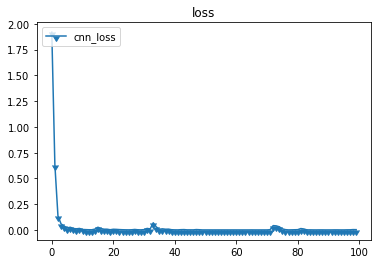

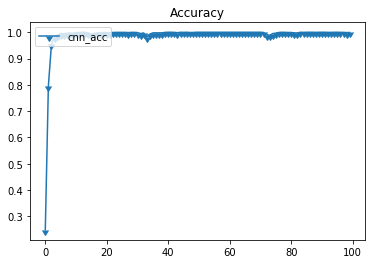

18/18 [==============================] - 10s 582ms/step - loss: 0.0118 - acc: 0.9964
n Test_Accuracy:- 0.99642855
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        79
           2       1.00      1.00      1.00        80
           3       1.00      1.00      1.00        80
           4       1.00      1.00      1.00        80
           5       1.00      1.00      1.00        80
           6       1.00      1.00      1.00        80

    accuracy                           1.00       560
   macro avg       1.00      1.00      1.00       560
weighted avg       1.00      1.00      1.00       560

confusion matrix
[[81  0  0  0  0  0  0]
 [ 0 79  0  0  0  0  0]
 [ 0  0 80  0  0  0  0]
 [ 0  0  0 80  0  0  0]
 [ 0  0  0  0 80  0  0]
 [ 0  0  0  0  0 80  0]
 [ 0  0  0  0  0  0 80]]


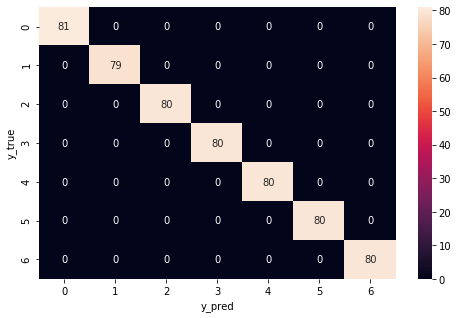

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.preprocessing import image
from tensorflow.keras.models import load_model
from keras.layers import BatchNormalization
from sklearn.metrics import classification_report
import sklearn.metrics
print('TESS SPECTRO 80%!')
from tensorflow.keras.constraints import unit_norm
from tensorflow.keras import layers
from tensorflow.keras import regularizers

path_dir_DATASET="C:/Users/INSIDE BINARIES/Documents/LABO_PYTHON/DATASET/TESS_by_Spectro/"

datagen = ImageDataGenerator(
                    rescale=1./255,
                    validation_split = 0.2)
train_generator = datagen.flow_from_directory(
    path_dir_DATASET,
    target_size=(1080,216),
    shuffle=True,
    subset='training'
)
validation_generator = datagen.flow_from_directory(
    path_dir_DATASET,
    target_size=(1080,216),
    subset='validation'
)

IMAGE_HEIGHT=216
IMAGE_WIDTH=1080
N_CHANNELS=3
N_CLASSES=7
# Create CNN model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(IMAGE_WIDTH, IMAGE_HEIGHT, N_CHANNELS)))
model.add(tf.keras.layers.Conv2D(32, 3, strides=2, padding='same', activation='relu'))
#model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
#model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
#model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
#model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'))
#model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
#model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
#model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(N_CLASSES, activation='softmax'))

# Compile model
#model.compile(
#    loss='sparse_categorical_crossentropy',
#   optimizer=tf.keras.optimizers.RMSprop(),
#    metrics=['accuracy'],
#)

# Train model for 10 epochs, capture the history
#history_cnn = model.fit(train_generator, epochs=10, validation_data=validation_generator)


##FINISH MODIFICATION
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_cnn = model.fit(train_generator,batch_size=32,epochs=100)
model.save('80k_NewCNNmodelUsingTESS_SPECTRO_IUGET.h5')
yhat = model.predict(train_generator)


import matplotlib.pyplot as plt

loss_curve = history_cnn.history["loss"]
acc_curve = history_cnn.history["acc"]

#loss_val_curve = history.history["val_loss"]
#acc_val_curve = history.history["val_accuracy"]

plt.plot(loss_curve, label="cnn_loss",  marker=11)

plt.legend(loc="upper left")
plt.title("loss")
plt.savefig('acc_loss.png')
plt.show()

plt.plot(acc_curve, label="cnn_acc",  marker=11)

plt.legend(loc="upper left")
plt.title("Accuracy")
plt.savefig('acc_cnn.png')
plt.show()

accuracy = model.evaluate(validation_generator)
print('n', 'Test_Accuracy:-', accuracy[1])
pred = model.predict(validation_generator)
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(pred, axis=1)
print(classification_report(y_true, y_pred, labels=[0,1, 2,3,4,5,6]))  #Car sur RAVDESS il ya 8 emotions
print('confusion matrix')
print(confusion_matrix(y_true, y_pred))
    #confusion matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
#Fonction pour Encoder un fichier Audio en Spectrogramme

In [5]:
#Fonction qui prend en entrée un spectrogramme et donne en sortie une émotion
import tensorflow as tf
#Dictionnaires d'émotions
Emotions_Dictionary={0:'Neutral',1:'Happy',2:'Sad',3:'Angry',4:'Fearful',5:'Disgust',6:'pSurpise'}
def EmotionsPredictionFormSpectrogrammee(SpectrogramUtteranceFolder):
    #Charger les SpectroGramme des prises de paroles (classés par ordre chrnologique_alphanumérique dans le repertoire)
    path_dir = SpectrogramUtteranceFolder
    PrisesDeParole_datagen = ImageDataGenerator(
                    rescale=1./255)
    PrisesDeParole_generator = datagen.flow_from_directory(
    path_dir,
    target_size=(350,350),
    shuffle=False)
    
    #charger le model pré entrainé
    Pretrained_Model_PATH='C:/Users/fijitsu/Documents/A-LABORATORY-PYTHON/PretrainedCnnModel/model_4.h5'
    #MyPretrained_Model = tf.keras.models.load_model('MyPretrainedModel')
    MyPretrained_Model=model
    
    #Prediction des emotions
    pred = MyPretrained_Model.predict(PrisesDeParole_generator)
    y_pred = np.argmax(pred, axis=1)
    #Display result
    print(y_pred)
    return y_pred

    

In [53]:
##Testons voir
##SpectrogramUtteranceFolder='./SpectrogrammeLocuteurX/'

#SpectrogramUtteranceFolder=RavdessBySpectrogram_PATH+''
SpectrogramUtteranceFolder="C:/Users/fijitsu/Documents/A-LABORATORY-PYTHON/DATABASEInThe_STATEofTheART/PredictionDesSpectrogram/"
PredictedEmotions_labels=EmotionsPredictionFormSpectrogrammee(SpectrogramUtteranceFolder)
print('les émotions contenus dans les prises de parole:',[Emotions_Dictionary[ii] for ii in PredictedEmotions_labels])


Found 800 images belonging to 2 classes.
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 6 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

In [51]:

print('Validation of the Trained TESS New CNN model on RAVDESS dataset:')
#Happy_Detection_rate_RAVDESS=((PredictedEmotions_labels==0).sum())*100/len(PredictedEmotions_labels)
#print('Fear_Detection_rate_RAVDESS=',Happy_Detection_rate_RAVDESS,'%')

Disgust_Detection_rate_RAVDESS=2.6041666666666665
print('Disgust_Detection_rate_RAVDESS=',Disgust_Detection_rate_RAVDESS,'%')
Neutral_Detection_rate_RAVDESS=30.208333333333332 
print('Neutral_Detection_rate_RAVDESS=',Neutral_Detection_rate_RAVDESS,'%')

Surprise_Detection_rate_RAVDESS=9.895833333333334
print('Surprise_Detection_rate_RAVDESS it predict =',Surprise_Detection_rate_RAVDESS,'% ')

Anger_Detection_rate_RAVDESS=37.5 
print('Anger_Detection_rate_RAVDESS=',Anger_Detection_rate_RAVDESS,'%')
Sad_Detection_rate_RAVDESS=0.0
print('Sad_Detection_rate_RAVDESS=',Sad_Detection_rate_RAVDESS,'%')

Happy_Detection_rate_RAVDESS=23.4375
print('Happy_Detection_rate_RAVDESS=',Happy_Detection_rate_RAVDESS,'%')
Fear_Detection_rate_RAVDESS=11.979166666666666
print('Fear_Detection_rate_RAVDESS=',Fear_Detection_rate_RAVDESS,'%')
print(type(PredictedEmotions_labels))

Validation of the Trained TESS New CNN model on RAVDESS dataset:
Disgust_Detection_rate_RAVDESS= 2.6041666666666665 %
Neutral_Detection_rate_RAVDESS= 30.208333333333332 %
Surprise_Detection_rate_RAVDESS it predict = 9.895833333333334 % 
Anger_Detection_rate_RAVDESS= 37.5 %
Sad_Detection_rate_RAVDESS= 0.0 %
Happy_Detection_rate_RAVDESS= 23.4375 %
Fear_Detection_rate_RAVDESS= 11.979166666666666 %
<class 'numpy.ndarray'>


In [53]:

print(7*24*2*2*2+1*24*2*2)
print((187+201+203+192+191+96+191+192)/8)
print((7*192+96)/8)

1440
181.625
180.0


In [37]:
print('Validation of the Trained TESS New CNN model on EmoDB dataset:')
#Happy_Detection_rate_EmoDB=((PredictedEmotions_labels==1).sum())*100/len(PredictedEmotions_labels)
#print('Fear_Detection_rate_EmoDB=',Happy_Detection_rate_EmoDB,'%')

Disgust_Detection_rate_EmoDB=0.0 
print('Disgust_Detection_rate_EmoDB=',Disgust_Detection_rate_EmoDB,'%')
Neutral_Detection_rate_EmoDB=15.189873417721518
print('Neutral_Detection_rate_EmoDB=',Neutral_Detection_rate_EmoDB,'%')

Boredom_Detection_rate_EmoDB=45.67901234567901
print('Boredom_Detection_rate_EmoDB it predict =',Boredom_Detection_rate_EmoDB,'% of Angry instead')

Anger_Detection_rate_EmoDB=11.023622047244094 
print('Anger_Detection_rate_EmoDB=',Anger_Detection_rate_EmoDB,'%')
Sad_Detection_rate_EmoDB=6.451612903225806
print('Sad_Detection_rate_EmoDB=',Sad_Detection_rate_EmoDB,'%')

Happy_Detection_rate_EmoDB=0.0
print('Happy_Detection_rate_EmoDB=',Happy_Detection_rate_EmoDB,'%')
Fear_Detection_rate_EmoDB=73.91304347826087
print('Fear_Detection_rate_EmoDB=',Fear_Detection_rate_EmoDB,'%')
print(type(PredictedEmotions_labels))

Validation of the Trained TESS New CNN model on EmoDB dataset:
Disgust_Detection_rate_EmoDB= 0.0 %
Neutral_Detection_rate_EmoDB= 15.189873417721518 %
Boredom_Detection_rate_EmoDB it predict = 45.67901234567901 % of Angry instead
Anger_Detection_rate_EmoDB= 11.023622047244094 %
Sad_Detection_rate_EmoDB= 6.451612903225806 %
Happy_Detection_rate_EmoDB= 0.0 %
Fear_Detection_rate_EmoDB= 73.91304347826087 %
<class 'numpy.ndarray'>


In [52]:
print(24*2*2*2)

192


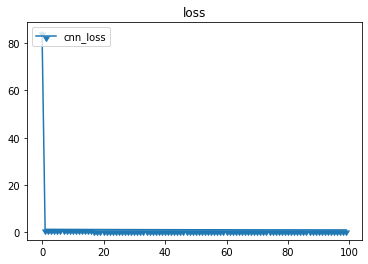

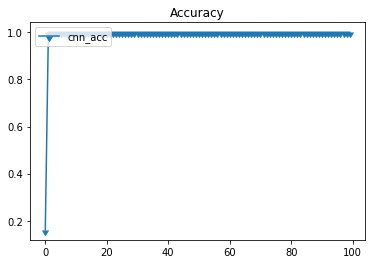

14/14 [==============================] - 10s 687ms/step - loss: 16.9899 - acc: 0.1218
n Test_Accuracy:- 0.12177986
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00        14
           2       0.00      0.00      0.00         0
           3       1.00      1.00      1.00        97
           4       0.00      0.00      0.00         0
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00       312
           7       0.00      0.00      0.00         0

   micro avg       1.00      1.00      1.00       427
   macro avg       0.62      0.62      0.62       427
weighted avg       1.00      1.00      1.00       427

confusion matrix
[[  3   0   0   0   0]
 [  0  14   0   0   0]
 [  0   0  97   0   0]
 [  0   0   0   1   0]
 [  0   0   0   0 312]]


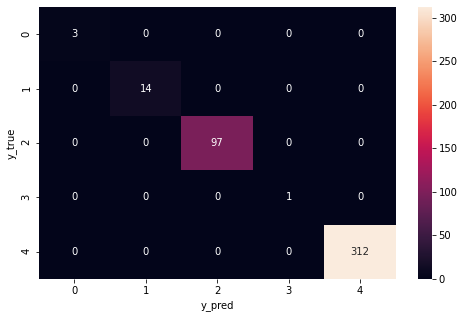

In [15]:
model.save('K_CNNmodelUsingRAVDESSDataSet.h5')
yhat = model.predict(train_generator)


import matplotlib.pyplot as plt

loss_curve = history_cnn.history["loss"]
acc_curve = history_cnn.history["acc"]

#loss_val_curve = history.history["val_loss"]
#acc_val_curve = history.history["val_accuracy"]

plt.plot(loss_curve, label="cnn_loss",  marker=11)

plt.legend(loc="upper left")
plt.title("loss")
plt.savefig('acc_loss.png')
plt.show()

plt.plot(acc_curve, label="cnn_acc",  marker=11)

plt.legend(loc="upper left")
plt.title("Accuracy")
plt.savefig('acc_cnn.png')
plt.show()

accuracy = model.evaluate(validation_generator)
print('n', 'Test_Accuracy:-', accuracy[1])
pred = model.predict(validation_generator)
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(pred, axis=1)
print(classification_report(y_true, y_pred, labels=[0,1, 2,3,4,5,6,7]))  #Car sur RAVDESS il ya 8 emotions
print('confusion matrix')
print(confusion_matrix(y_true, y_pred))
    #confusion matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [25]:
datagen = ImageDataGenerator(
                    rescale=1./255,
                    validation_split = 0.3)
train_generator = datagen.flow_from_directory(
    path_dir,
    target_size=(350,350),
    shuffle=True,
    subset='training'
)
validation_generator = datagen.flow_from_directory(
    path_dir,
    target_size=(350,350),
    subset='validation'
)


32/32 [==============================] - 24s 740ms/step - loss: 3.7440 - acc: 0.2616
n Test_Accuracy:- 0.2615992


In [38]:
accuracy = model.evaluate(train_generator)
print('n', 'Test_Accuracy:-', accuracy[1])


32/32 [==============================] - 12s 383ms/step - loss: 0.0026 - acc: 1.0000
n Test_Accuracy:- 1.0


In [52]:
model.save('NewCNNmodelUsingTESSDataSet.h5')
print('End n')

End n
